# Reading netCDF files with python

We will use the netCDF4 library (https://github.com/Unidata/netcdf4-python) for the reading and [matplotlib](http://matplotlib.org/) for the plotting.

In [27]:
import os
import matplotlib.pyplot as plt
import netCDF4
import numpy as np

# Reading the data

Let's define the data file we want to process:

In [24]:
datadir = "./OpenSeaLab/autumn"
figdir = "./figures/"
htmldir = "./html/"
datafile = os.path.join(datadir, "Water_body_nitrate.4Danl.nc")

## Metadata (file header)

In [5]:
with netCDF4.Dataset(datafile) as nc:
    print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    project: SeaDataNetII: http://www.seadatanet.org/
    institution: Hellenic Centre for Marine Research, Hellenic National Oceanographic Data Centre (HCMR/HNODC)
    production: Diva group. E-mails: a.barth@ulg.ac.be; swatelet@ulg.ac.be
    data_access: GHER OPENDAB: http://gher-diva.phys.ulg.ac.be/data/
    WEB_visualisation: http://gher-diva.phys.ulg.ac.be/web-vis/clim.html
    Author_e-mail: Athanasia (Sissy) Iona <sissy@hnodc.hcmr.gr>
    date: 2015-06-16
    title: DIVA 4D analysis of Water_body_nitrate
    file_name: ../output/3Danalysis/Water_body_nitrate.4Danl.nc
    source: observational data from SeaDataNet/EMODNet Chemistry Data Network
    comment: Every year of the time dimension corresponds to a 10-year centred average for the winter (Jan-Mar) or spring (Apr-Jun) or summer (Jul-Sept) or automn (Oct-Dec) season
    product_id: 4b65b074-19a2-11e5-95c0-805

## Variables

In [6]:
with netCDF4.Dataset(datafile) as nc:
    varnames = nc.variables.keys()
for var in varnames:
    print(var)

CLfield
CORRLEN
SNR
VARBACK
Water_body_nitrate
Water_body_nitrate_L1
Water_body_nitrate_L2
Water_body_nitrate_deepest
Water_body_nitrate_deepest_L1
Water_body_nitrate_deepest_L2
Water_body_nitrate_err
Water_body_nitrate_relerr
climatology_bounds
databins
depth
lat
lon
obsdepth
obsid
obslat
obslon
obstime
outlbins
time


## Load a single variable
The `print` command provides a summary of the considered variable.

In [7]:
with netCDF4.Dataset(datafile) as nc:
    nitrate = nc.variables['Water_body_nitrate_L1']
    print(nitrate)

<class 'netCDF4._netCDF4.Variable'>
float32 Water_body_nitrate_L1(time, depth, lat, lon)
    long_name: Water_body_nitrate masked using relative error threshold 0.3
    units: umol/l
    valid_min: 0.0
    valid_max: 661.0
    _FillValue: -9999.9
    missing_value: -9999.9
unlimited dimensions: 
current shape = (45, 25, 48, 67)
filling on


To get the variable values:    

In [8]:
with netCDF4.Dataset(datafile) as nc:
    nitrate = nc.variables['Water_body_nitrate_L1'][:]
print(type(nitrate))
print(nitrate.shape)

<class 'numpy.ma.core.MaskedArray'>
(45, 25, 48, 67)


## Load the coordinates
The field has 4 dimensions:
* time, 
* depth, 
* latitude,
* longitude.

The print command provides a summary:

In [9]:
with netCDF4.Dataset(datafile) as nc:
    time = nc.variables['time']
    print(time)

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: Days since 1960-01-01
    climatology: climatology_bounds
unlimited dimensions: 
current shape = (45,)
filling on, default _FillValue of 9.969209968386869e+36 used



To get the variable values, we add `[:]` after the variable name:

In [10]:
with netCDF4.Dataset(datafile) as nc:
    lon = nc.variables['lon'][:]
    lat = nc.variables['lat'][:]
    time = nc.variables['time'][:]
    depth = nc.variables['depth'][:]

## Variable attributes
For example, the time units:

In [11]:
with netCDF4.Dataset(datafile) as nc:
    timeunits = nc.variables['time'].units
print(timeunits)
type(timeunits)

Days since 1960-01-01


str

Selection of a given year:     
the netCDF4 library provides a method to convert the time into dates:

In [12]:
dates = netCDF4.num2date(time, timeunits)
print(dates)

[datetime.datetime(1965, 11, 16, 0, 0)
 datetime.datetime(1966, 11, 16, 0, 0)
 datetime.datetime(1967, 11, 16, 0, 0)
 datetime.datetime(1968, 11, 16, 0, 0)
 datetime.datetime(1969, 11, 16, 0, 0)
 datetime.datetime(1970, 11, 16, 0, 0)
 datetime.datetime(1971, 11, 16, 0, 0)
 datetime.datetime(1972, 11, 16, 0, 0)
 datetime.datetime(1973, 11, 16, 0, 0)
 datetime.datetime(1974, 11, 16, 0, 0)
 datetime.datetime(1975, 11, 16, 0, 0)
 datetime.datetime(1976, 11, 16, 0, 0)
 datetime.datetime(1977, 11, 16, 0, 0)
 datetime.datetime(1978, 11, 16, 0, 0)
 datetime.datetime(1979, 11, 16, 0, 0)
 datetime.datetime(1980, 11, 16, 0, 0)
 datetime.datetime(1981, 11, 16, 0, 0)
 datetime.datetime(1982, 11, 16, 0, 0)
 datetime.datetime(1983, 11, 16, 0, 0)
 datetime.datetime(1984, 11, 16, 0, 0)
 datetime.datetime(1985, 11, 16, 0, 0)
 datetime.datetime(1986, 11, 16, 0, 0)
 datetime.datetime(1987, 11, 16, 0, 0)
 datetime.datetime(1988, 11, 16, 0, 0)
 datetime.datetime(1989, 11, 16, 0, 0)
 datetime.datetime(1990, 

# Creating  plots

## Simple plots
We will represent 2D fields (longitude and latitude).  

In [13]:
nitrate2D = nitrate[-1, -1, :, :]
print(nitrate2D.shape)

(48, 67)


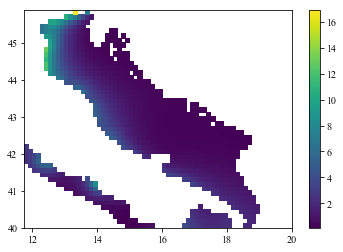

In [14]:
fig = plt.figure()
plt.pcolormesh(lon, lat, nitrate2D)
plt.colorbar()
plt.show()
plt.close()

## Interacting with [leaflet](http://leafletjs.com/)

The [folium]() package provides an easy way to set up a [leaflet](http://leafletjs.com/) map using python command.     
We also load the [Basemap]() package that allows us to work with geographical projections.

In [21]:
import folium
from folium import plugins
from mpl_toolkits.basemap import Basemap 

First we need to define the map object using either the central point (as follows) or the domain bounding box.

In [29]:
lmap = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=7)

Then we will create a png image. The projection has to be set to epsg=3857
in order to have images properly overlaying Leaflet basemap

In [25]:
m = Basemap(llcrnrlon=lon.min(), llcrnrlat=lat.min(),
            urcrnrlon=lon.max(), urcrnrlat=lat.max(), 
            resolution = 'l', epsg=3857)

Once the projection is instancied, we can create the figure and save it as a png image.

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


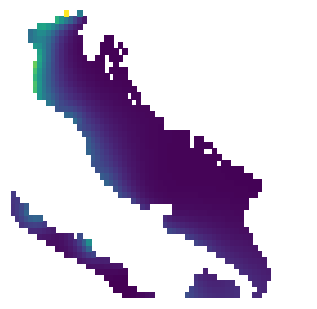

In [28]:
llon, llat = np.meshgrid(lon, lat)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
m.ax = ax
m.pcolormesh(llon, llat, nitrate[-1, -1, :, :], latlon=True)
plt.savefig(os.path.join(figdir, "nitrate.png"), dpi=300,
            transparent=True, 
            bbox_inches='tight', 
            pad_inches=0)
plt.show()
plt.close()

The last step consists in adding the image as an overlay.

In [31]:
folium.plugins.ImageOverlay(os.path.join(figdir, "nitrate.png"),
                            bounds=[[lat.min().tolist(), lon.min().tolist()], 
                                    [lat.max().tolist(), lon.max().tolist()]], 
                            opacity=0.8
                           ).add_to(lmap)
lmap